In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
novaMatrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Nova_Matrícula_Separada.csv')
rematrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Rematrícula_Separada.csv')

In [4]:
novaMatrícula['Bolsa'] = novaMatrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)
rematrícula['Bolsa'] = rematrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)

In [5]:
novaMatrícula

,Código Candidato,Data de nascimento,Série,Unidade,Data de Inscrição,Data da matrícula,Tipo,Bolsa (%),Real Anuidade,Diferença,Bolsa
0,CL0002,21/1/2021,Infantil 4,Conceição do Mato Dentro,2024-12-19,2024-12-20,Matrícula nova,"50,00%",15.176,1,50.0
1,CL0002,21/01/2021,Infantil 4,Conceição do Mato Dentro,2024-12-19,2024-12-20,Matrícula nova,"50,00%",15.176,1,50.0
2,CL0019,23/01/2022,Infantil 3,Castelo,2025-01-21,2025-01-27,Matrícula nova,"66,60%",6.672,6,66.6
3,CL0019,23/01/2022,Infantil 3,Castelo,2025-01-21,2025-01-27,Matrícula nova,"66,60%",6.672,6,66.6
4,CL0047,19/04/2015,5º ano,Conceição do Mato Dentro,2024-12-02,2024-12-02,Matrícula nova,"100,00%",11.471,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
3416,CL9979,09/07/2014,5º ano bilíngue,Lagoa Santa,2024-08-16,2024-12-20,Matrícula nova,"43,00%",14.421,126,43.0
3417,CL9987,11/04/2017,2º ano,Nova Suíça,2024-10-14,2024-10-24,Matrícula nova,"100,00%",0.000,10,100.0
3418,CL9987,11/4/2017,2º ano,Nova Suíça,2024-10-14,2024-10-24,Matrícula nova,"100,00%",0.000,10,100.0
3419,CL9991,18/05/2017,3º ano,Carlos Prates,2024-11-13,2024-11-25,Matrícula nova,"50,00%",12.530,12,50.0


In [6]:
escolas1 = set(novaMatrícula['Unidade'].unique())
escolas1

{'Alípio de Melo',
 'Carajás',
 'Carlos Prates',
 'Castelo',
 'Castelo Manacás',
 'Conceição do Mato Dentro',
 'Gutierrez',
 'Jaraguá',
 'Jardim Canadá',
 'Lagoa Santa',
 'Mais Belvedere',
 'Mais Buritis',
 'Mais Cidade Nova',
 'Mais Pampulha',
 'Nova Suíça',
 'Ouro Preto',
 'Santa Amélia'}

In [7]:
escolas2 = set(rematrícula['Unidade'].unique())
escolas2

{'Alípio de Melo',
 'Carajás',
 'Carlos Prates',
 'Castelo',
 'Castelo Manacás',
 'Conceição do Mato Dentro',
 'Gutierrez',
 'Jaraguá',
 'Jardim Canadá',
 'Lagoa Santa',
 'Mais Belvedere',
 'Mais Buritis',
 'Mais Cidade Nova',
 'Mais Pampulha',
 'Nova Suíça',
 'Ouro Preto',
 'Ouro Preto Integral',
 'Santa Amélia'}

### Demonstrando quais unidades apresentam as maiores concessões de descontos

##### Unidades das novas matrículas

In [8]:
vetor = []
for escola in escolas1:
    pe = novaMatrícula[novaMatrícula['Unidade'] == escola]['Bolsa'].max()
    if(pe == 100):
        vetor.append(escola)
    print("O maior desconto oferecido da unidade", escola, "é de:", pe, "por cento.")

O maior desconto oferecido da unidade Conceição do Mato Dentro é de: 100.0 por cento.
O maior desconto oferecido da unidade Lagoa Santa é de: 100.0 por cento.
O maior desconto oferecido da unidade Alípio de Melo é de: 100.0 por cento.
O maior desconto oferecido da unidade Nova Suíça é de: 100.0 por cento.
O maior desconto oferecido da unidade Mais Belvedere é de: 80.0 por cento.
O maior desconto oferecido da unidade Ouro Preto é de: 100.0 por cento.
O maior desconto oferecido da unidade Carlos Prates é de: 100.0 por cento.
O maior desconto oferecido da unidade Santa Amélia é de: 100.0 por cento.
O maior desconto oferecido da unidade Castelo é de: 100.0 por cento.
O maior desconto oferecido da unidade Mais Pampulha é de: 100.0 por cento.
O maior desconto oferecido da unidade Mais Cidade Nova é de: 100.0 por cento.
O maior desconto oferecido da unidade Carajás é de: 100.0 por cento.
O maior desconto oferecido da unidade Gutierrez é de: 70.0 por cento.
O maior desconto oferecido da unidad

Lista das unidades que mais dão descontos

In [9]:
i = 0
while i < len(vetor):
    print(vetor[i])
    i+=1

Conceição do Mato Dentro
Lagoa Santa
Alípio de Melo
Nova Suíça
Ouro Preto
Carlos Prates
Santa Amélia
Castelo
Mais Pampulha
Mais Cidade Nova
Carajás
Castelo Manacás


##### Unidades das rematrículas

In [10]:
for escola in escolas2:
    pe = rematrícula[rematrícula['Unidade'] == escola]['Bolsa'].max()
    print("O maior desconto oferecido da unidade ", escola, "é: ", pe, "por cento.")

O maior desconto oferecido da unidade  Ouro Preto é:  100.0 por cento.
O maior desconto oferecido da unidade  Conceição do Mato Dentro é:  100.0 por cento.
O maior desconto oferecido da unidade  Alípio de Melo é:  100.0 por cento.
O maior desconto oferecido da unidade  Nova Suíça é:  100.0 por cento.
O maior desconto oferecido da unidade  Lagoa Santa é:  100.0 por cento.
O maior desconto oferecido da unidade  Castelo Manacás é:  100.0 por cento.
O maior desconto oferecido da unidade  Carlos Prates é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Belvedere é:  100.0 por cento.
O maior desconto oferecido da unidade  Santa Amélia é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Pampulha é:  100.0 por cento.
O maior desconto oferecido da unidade  Castelo é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Cidade Nova é:  100.0 por cento.
O maior desconto oferecido da unidade  Ouro Preto Integral é:  100.0 por cento.
O maior desconto oferecido da

Na rematrícula todas as unidades dão descontos que podem ir até 100%.

### Demonstrando a média de desconto das unidades

In [11]:
médiaRematrícula = rematrícula.groupby('Unidade').agg(
    Soma = ('Bolsa', 'sum'),
    Contagem = ('Bolsa' , 'count')
)

In [16]:
médiaRematrícula['média'] = round(médiaRematrícula['Soma']/médiaRematrícula['Contagem'])
médiaRematrícula

,Soma,Contagem,média
Unidade,,,
Alípio de Melo,37084.4,735,50.0
Carajás,115573.8,1178,98.0
Carlos Prates,20599.1,365,56.0
Castelo,9129.8,173,53.0
Castelo Manacás,11070.5,209,53.0
Conceição do Mato Dentro,18994.4,352,54.0
Gutierrez,15281.7,378,40.0
Jaraguá,12205.6,277,44.0
Jardim Canadá,9446.7,218,43.0


In [25]:
médiaNovaMatrícula = novaMatrícula.groupby('Unidade').agg(
    Soma = ('Bolsa', 'sum'),
    Contagem = ('Bolsa' , 'count')
)

In [30]:
médiaNovaMatrícula['média'] = round(médiaNovaMatrícula['Soma']/médiaNovaMatrícula['Contagem'])
médiaNovaMatrícula

,Soma,Contagem,média
Unidade,,,
Alípio de Melo,18648.7,328,57.0
Carajás,17900.0,182,98.0
Carlos Prates,15689.6,256,61.0
Castelo,9049.2,150,60.0
Castelo Manacás,6776.0,125,54.0
Conceição do Mato Dentro,13205.0,223,59.0
Gutierrez,8169.0,168,49.0
Jaraguá,6665.2,132,50.0
Jardim Canadá,5244.4,99,53.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Conceição do Mato Dentro'),
  Text(1, 0, 'Castelo'),
  Text(2, 0, 'Castelo Manacás'),
  Text(3, 0, 'Lagoa Santa'),
  Text(4, 0, 'Gutierrez'),
  Text(5, 0, 'Jaraguá'),
  Text(6, 0, 'Alípio de Melo'),
  Text(7, 0, 'Carlos Prates'),
  Text(8, 0, 'Mais Buritis'),
  Text(9, 0, 'Mais Cidade Nova'),
  Text(10, 0, 'Nova Suíça'),
  Text(11, 0, 'Santa Amélia'),
  Text(12, 0, 'Mais Pampulha'),
  Text(13, 0, 'Carajás'),
  Text(14, 0, 'Jardim Canadá'),
  Text(15, 0, 'Mais Belvedere'),
  Text(16, 0, 'Ouro Preto')])

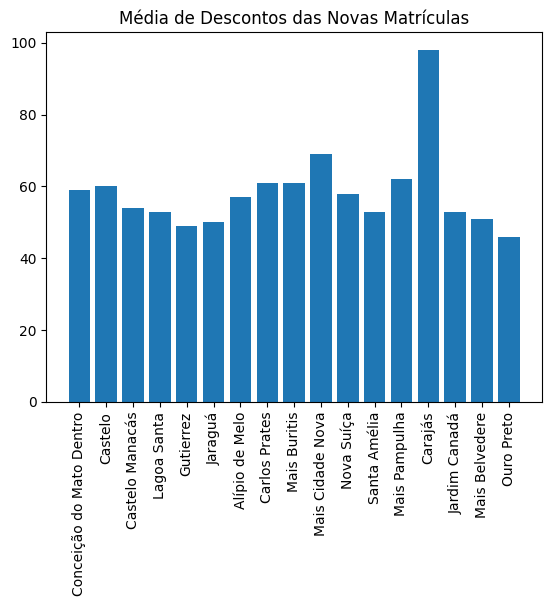

In [39]:
plot1 = novaMatrícula.merge(médiaNovaMatrícula, on = 'Unidade', how = 'left')
plt.bar(plot1['Unidade'], plot1['média'])
plt.title('Média de Descontos das Novas Matrículas')
plt.xticks(rotation=90)